# Algorithmic Fairness, Accountability, and Ethics, Spring 2023
# Exercise 2

The first three parts require no programming.
The final part requires programming and will be reused for Mandatory Assignment 1.

## Task 1 (basics)

Take a look at the following set of individuals:

![](001.png)

As in the lecture, individuals that have the target (T = 1) are drawn in blue, others (T = 0) are drawn in red. G = 0 refers to the triangle group, G = 1 refers to the circle group. Different to the lecture material, the visual split-up happens by selection status, not by target. 



- Compute the following probabilities: 
  - $\Pr(G = 1) = 6/10$ 
  - $\Pr(G = 0) = 4/10 $
  - $\Pr(S = 1 \mid G = 1) = 4/6$
  - $\Pr(S = 1 \mid G = 0) = 2/4$
  - $\Pr(S = 1 \mid G = 1, T = 1) = 3/3$ becuase of the blue circles, we have selected all of them
  - $\Pr(S = 1 \mid G = 0, T = 1) = 1/2$  we are looking at the probability backwards when choosing what to look at
- Verify the following fairness criteria
  - $G \perp S$ (demographic parity) proibability of being selected is equal in both groups. it is not the same cause 2/4 triangles are selected, and 4/6 circles are selected
  - $G \perp S | T$ (equalized odds)
      - $\Pr(S = 1 \mid G = 0, T = 1) = 1/2$ of the blue triangles, how many were checked yes
      - $\Pr(S = 1 \mid G = 1, T = 1) = 3/3$
      - $\Pr(S = 1 \mid G = 1, T = 0) = 1/3$ 
      - $\Pr(S = 1 \mid G = 0, T = 0) = 1/2$ within the red triangles, how many we have selected 
  - $G \perp T | S$ (equalized outcome)
      - $\Pr(T=1 \mid G=0, S=1)= 1/2$
      - $\Pr(T=1 \mid G=1, S=1)= 3/4$
- In case one of the fairness conditions is not satisfied, change the example to satisfy it. What is the minimum number of changes necessary in each case? 
    - for the statistical parity, change one of the S=1 circles to be a S=0
    - for equalised odds, for the blues, check both blue triangles
    - for the equalised outcomes, good question
- Change the example such that all three fairness conditions hold at the same time.
        that what is what we talked about in class, you can't



## Task 2 (Other fairness criteria)

Consider the following fairness criteria: $G \perp T$ and $S \perp T$. 

- Find an intuitive explanation of these criteria, respectively. How would you call them?
        - the group you are in, does not influence the label that you have. so triangles and circles should have the same percentage of blue
        - the label you get (checkmark) does not get influenced by the color you are. picking at random 
- Formally write out how you verify the conditions in the case that $G$, $S$, and $T$ are binary. no <3
- Can all criteria $G \perp S$ (demographic parity), $G \perp T$, and $S \perp T$ hold at the same time? If yes, give an example. If no, reason for the impossibility.
        - no they can't, according to the lecture and proofs. 


## Task 3 (Fairness/Utility-Tradeoff)

**Remark:** You might find it easier to solve this task by writing some code.

Look at the following two picture that presents group and target as usual, but instead of seeing the outcome of the selection, we just see the score. (You can think about it as the grade point average achieved in school.)

![](002.png)

We discuss a classifier that selects all individuals above a certain (maybe group-specific) threshold.

1) Sketch the ROC curve for a threshold based classifier (or actually plot it).
2) Let us say that we are in a situation where a false positive costs us 150 DKK, a true positive gives us 100 DKK.
    - If we want to maximize the profit using a single threshold, which one would it be?
    - If we want to achieve statistical parity by choosing individual threshold values, which thresholds can we choose? Which one provides the best utility, i.e., the largest profit? 
    - At which individual thresholds do you achieve equalized odds in this setting? Which setting achieves the best utility?

## Practical exercise

In this exercise, we will work with a very recently published dataset that collects data from the US Census 2020. The dataset and a description is available at <https://github.com/zykls/folktables>. The features names are described in the appendix of the accompanying paper at <https://arxiv.org/pdf/2108.04884.pdf>.

The goal of this exercise is to prepare mandatory assignment 1, in which you will further explore the dataset in terms of fairness and interpretability.

## Task 1 (Installation)

Carry out the installation tasks at <https://github.com/zykls/folktables#basic-installation-instructions>.

After successful installation, you should be able to run the following code to generate a prediction task.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

In [3]:
from folktables.acs import adult_filter
from folktables import ACSDataSource, BasicProblem
import numpy as np
from sklearn.model_selection import train_test_split


data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
acs_data = data_source.get_data(states=["CA"], download=False) # this is only for california. but otherwise same as the github


ACSIncomeNew = BasicProblem(
    features=[
        'AGEP', # include AGE
        'COW', # include class of worker
        'SCHL', # include school education
        'WKHP', # include reported working hours
        'SEX', # include sex
    ],
    target='PINCP',
    target_transform=lambda x: x > 25000,    
    group='SEX',
    preprocess=adult_filter,
    postprocess=lambda x: np.nan_to_num(x, -1),
)

features, label, group = ACSIncomeNew.df_to_numpy(acs_data)

X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    features, label, group, test_size=0.2, random_state=0)

In [8]:
print(ACSIncomeNew)


array([[46.,  2., 22., 45.,  2.],
       [45.,  1., 21., 50.,  2.],
       [40.,  1., 21., 40.,  2.],
       ...,
       [60.,  1., 21., 60.,  1.],
       [47.,  3., 22., 60.,  1.],
       [58.,  3., 16., 30.,  2.]])

After carrying out these steps, you have a training and test datasets that contain the feature vector, group status, and predicted label. 

The prediction task here is to predict whether or not an individual has an income above 25000 USD per year. As group we use male/female (but others are possible from the dataset, e.g., race via the `RAC1P` feature). 

## Task 2 (Initial exploration)

The idea is to build a simple classifier yourself. (We will discuss classifiers in the next two lectures in more detail.)

In [ ]:
# ADD code here to explore the properties of the dataset.
# E.g., how does the prediction depend on the age? 
# What about the education status?
# How about the sex?
# It might be easier for you to work with `acs_data` from above, which is a pandas dataframe
# The goal is not to build the perfect classifier, but rather to understand the features and their interaction with the target.


In [17]:
df = pd.DataFrame(X_train, columns = ["age", "class", "education", "working_hours", "sex"])
df["income"] = y_train

df

,age,class,education,working_hours,sex,income
0,46.0,2.0,22.0,45.0,2.0,True
1,45.0,1.0,21.0,50.0,2.0,True
2,40.0,1.0,21.0,40.0,2.0,True
3,59.0,1.0,24.0,40.0,1.0,True
4,23.0,1.0,19.0,40.0,2.0,False
...,...,...,...,...,...,...
156527,29.0,1.0,16.0,40.0,2.0,True
156528,42.0,1.0,21.0,40.0,2.0,True
156529,60.0,1.0,21.0,60.0,1.0,True
156530,47.0,3.0,22.0,60.0,1.0,True


In [24]:
high = df[df["income"]==True]
low = df[df["income"]==False]

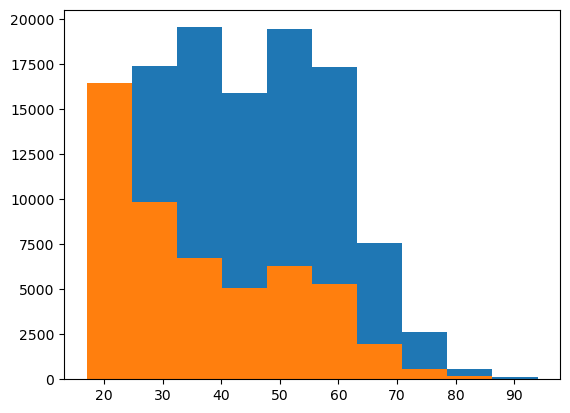

In [25]:
plt.hist(high["age"])
plt.hist(low["age"])
plt.show()

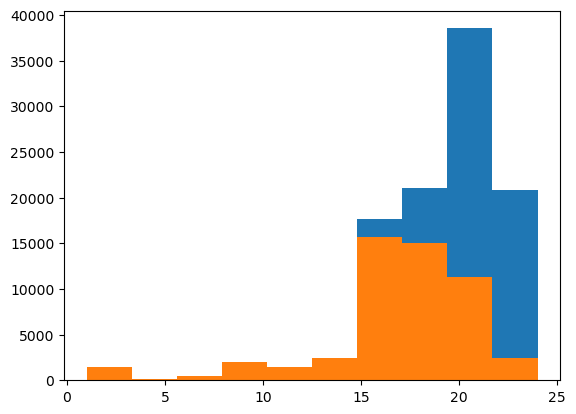

In [27]:
plt.hist(high["education"])
plt.hist(low["education"])
plt.show()

(array([23482.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 28959.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

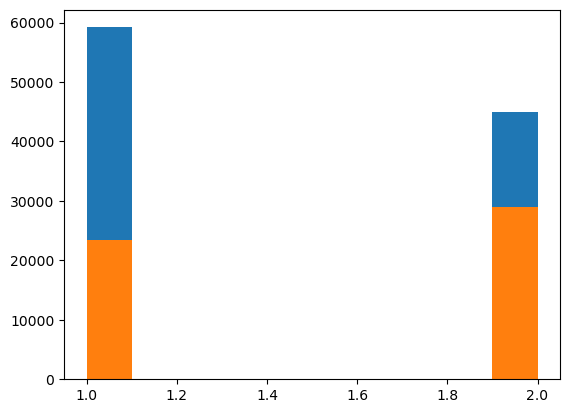

In [33]:
plt.hist(high["sex"])
plt.hist(low["sex"])

above we can see that the orange is the low income and blue is high income, and generally, you have more points of high income, but also for men there are more high income men than womes, and the opposite for low income. 
higher income, higher education etc. 

below I am going to follow a tutorial from medium to get more ideas of what to look at: (link: <https://medium.com/towards-data-science/analysing-fairness-in-machine-learning-with-python-96a9ab0d0705>)

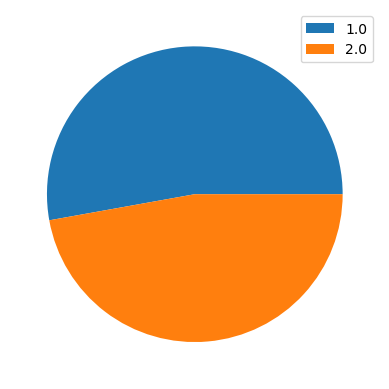

In [ ]:
counts_sex = df["sex"].value_counts()
labels = counts_sex.index #(one is males and 2 is females)
plt.pie(counts_sex)
plt.legend(labels)

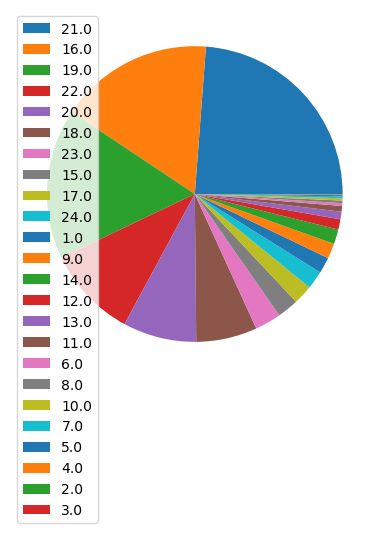

In [49]:
counts_edu = df["education"].value_counts()
labels = counts_edu.index #(one is males and 2 is females)
plt.pie(counts_edu)
plt.legend(labels)

True     104091
False     52441
Name: income, dtype: int64


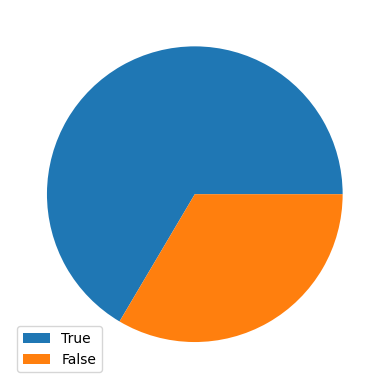

In [58]:
counts_income = df["income"].value_counts()
labels = counts_income.index #(one is males and 2 is females)
plt.pie(counts_income)
plt.legend(labels)
print(counts_income)

now calculating prevalence: proportion of positive cases to overall cases, we ca do it for the sex 

In [56]:
prev = df["income"].mean()
prev_sex = df.groupby("sex")["income"].mean()
print(f"prev : {prev}, \nprev sex : {prev_sex}")

prev : 0.6649822400531521, 
prev sex : sex
1.0    0.716024
2.0    0.607825
Name: income, dtype: float64


looking for proxy variable to sex, by doing mutual information analysis 


In [68]:
df.dtypes

age              float64
class            float64
education        float64
working_hours    float64
sex              float64
income              bool
dtype: object

In [74]:
X = df[["age", "class", "education", 'working_hours']]

In [75]:
mut_sex = mutual_info_classif(X, df["sex"] )
mut_sex

array([0.        , 0.01454811, 0.00717755, 0.02457565])

from the last cell, we want numbers closest to 0. all of them a part from age are a bit connected to sex, 

## Task 3 (Building and evaluation a classifier)

Use your knowledge from Task 2 to build a simple classifier to predict whether an individual in the test group will make more than 25000 USD or not per year. Try to keep your classifier simple, and see whether you can include some kind of threshold.

1) Evaluate the accuracy of your classifier(s).
2) Check the following fairness conditions of your classifier for your classifier:
   - Statistical Parity ($G \perp S$)
   - Equalized odds ($G \perp S | T)$, report both $T = 1$ (true positive rate) and $T = 0$ (false positive rate).
   - Equalized outcome ($G \perp T | S)$, report both $S = 1$ and $S = 0$.
3) Discuss: How can you achieve fairness assumptions (statistical parity, equalized odds) with your classifier? Implement one intervention that should make the classifier more fair and evaluate its effect.

In [110]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report


In [115]:
df_test = pd.DataFrame(X_test, columns = ["age", "class", "education", "working_hours", "sex"])
df_test["income"] = y_test

df_test

,age,class,education,working_hours,sex,income
0,62.0,1.0,18.0,40.0,1.0,True
1,33.0,7.0,21.0,65.0,1.0,True
2,33.0,1.0,21.0,40.0,2.0,False
3,46.0,1.0,19.0,40.0,2.0,True
4,32.0,1.0,21.0,40.0,1.0,True
...,...,...,...,...,...,...
39128,32.0,1.0,21.0,50.0,1.0,True
39129,84.0,1.0,18.0,32.0,1.0,True
39130,65.0,1.0,22.0,50.0,1.0,True
39131,63.0,1.0,16.0,40.0,2.0,True


In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)
yhat= model.predict(X_test)

In [116]:
# just to make the code like the guy, without making his mistakes
df_test["y_pred"] = yhat

In [84]:
accuracy = accuracy_score(y_test, yhat)
accuracy

0.8082947895637953

In [112]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

       False       0.78      0.59      0.67     13001
        True       0.82      0.92      0.86     26132

    accuracy                           0.81     39133
   macro avg       0.80      0.75      0.77     39133
weighted avg       0.81      0.81      0.80     39133



In [40]:
group0_tpr = np.mean(yhat[(y_test ==1) & (group_test ==1)]) # males
group1_tpr = np.mean(yhat[(y_test==1) & (group_test==2)])  # females
group0_fpr = np.mean(yhat[(y_test ==0) & (group_test ==1)]) # males
group1_fpr = np.mean(yhat[(y_test==0) & (group_test==2)])  # females

In [41]:
# according to the github repo, equality of opportunity is calculated by detracting one from the other:
#which makes sense, you want the two to be as close to one another as possible duuuuuh
opportunity_equality = group0_tpr - group1_tpr
opportunity_equality

0.03964807616778754

In [109]:
equalised_odds = group0_fpr-group1_fpr
equalised_odds
# fpr difference is much higher than tpr difference

0.1392182448183535

Accuracy: percentage of correct predictions (true negs and pos over total number of observations)

Equal opportunity : true positive rate : number of true positives / tp+fn -> percentage of actual positives that were correctly predicted as positive (percentage of people that have rightfully benefitted from the model.)
    we want the two to be the same (for the one gender and the other) the difference to be less than a cutoff and the ration to be more than the cutoff

False "negative" rate: false negative /true positive+false negs -> percentage of actual positives incorrectly predicted as negative. percentage of people who have wrongfully not benefitted from the model. 
for equal opportunity, we need FNR = 1-TPR

"Equalised odds" = false positive rates. fp / fp+tn . percentage of actual negatives incorrectly predcted as positive. percentage of people wrongfully benefitting fromt he model. 
fro equalised odds, TRP_0 = TPR_1 and FPR_0 = FPR_1

In [122]:
df_test.dtypes

age              float64
class            float64
education        float64
working_hours    float64
sex              float64
income              bool
y_pred              bool
dtype: object

In [119]:

# from github code copy pasted
def fairness_metrics(df):
    """Calculate fairness for subgroup of population"""
    
    #Confusion Matrix
    cm=confusion_matrix(df_test["income"],df_test["y_pred"])
    TN, FP, FN, TP = cm.ravel()
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    TPR = TP/(TP+FN) # True positive rate
    FPR = FP/(FP+TN) # False positive rate
    FNR = FN/(TP+FN) # False negative rate
    PPP = (TP + FP)/N # % predicted as positive
    
    return np.array([ACC, TPR, FPR, FNR, PPP])  

In [128]:
metrics_sex_male = fairness_metrics(df_test[df_test["sex"]==1.0])
metrics_sex_female = fairness_metrics(df_test[df_test["sex"]==2.0])
print(metrics_sex_male)
print(metrics_sex_female)

[0.80829479 0.91569723 0.40758403 0.08430277 0.74688882]
[0.80829479 0.91569723 0.40758403 0.08430277 0.74688882]


clearly something is funky, cause the numbers should not be the same, so back at the annoying code from before.

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
cm=confusion_matrix(y_test,yhat)
TN, FP, FN, TP = cm.ravel()
N = TP+FP+FN+TN #Total population
ACC = (TP+TN)/N #Accuracy
TPR = TP/(TP+FN) # True positive rate
FPR = FP/(FP+TN) # False positive rate
FNR = FN/(TP+FN) # False negative rate
PPP = (TP + FP)/N # % predicted as positive

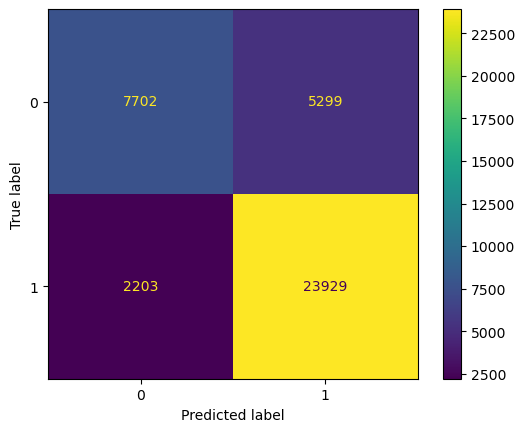

In [106]:
d = ConfusionMatrixDisplay(confusion_matrix=cm)
d.plot()

In [126]:
cm2=confusion_matrix(df_test["income"],df_test["y_pred"])
TN, FP, FN, TP = cm.ravel()
N = TP+FP+FN+TN #Total population
ACC = (TP+TN)/N #Accuracy
TPR = TP/(TP+FN) # True positive rate
FPR = FP/(FP+TN) # False positive rate
FNR = FN/(TP+FN) # False negative rate
PPP = (TP + FP)/N # % predicted as positive

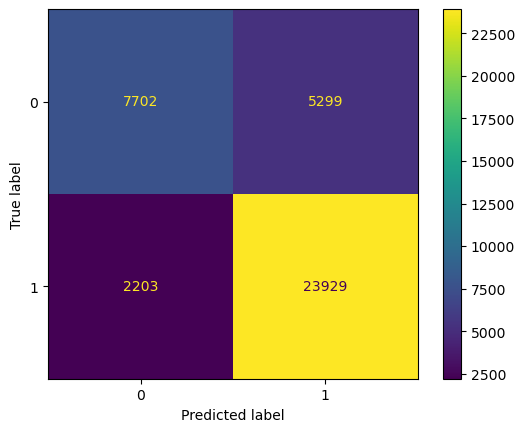

In [127]:
d2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
d2.plot()

In [ ]:
# equal opportunity: we TPR_0/TPR_1


[[ 7702  5299]
 [ 2203 23929]]


TODO change the basic classifier to have multiple thresholds, and calculate the metrics wiht the different thresholds, 

[0.80829479 0.91569723 0.40758403 0.08430277 0.74688882]
[0.80829479 0.91569723 0.40758403 0.08430277 0.74688882]


### Additional ideas

1) Replace your classifier with a standard classifier such as linear regression, a decision tree, a random forest, or a neural network. How do the results change? 
2) Change the prediction task: For example, you could set the income much higher. What is the influence of changing the prediction task?